# 1.1)The Hodgkin-Huxley model

## Simulation Questions

## 1)

## part 1: action potential-time (the excitation equal to 20 𝜇𝐴/𝑐𝑚^2 lasting 0.2𝑚𝑠)

In [65]:
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import pylab as plt
from scipy.integrate import odeint

In [91]:
class HodgkinHuxley():
    #The Hodgkin–Huxley Constants
    C_m  =   1.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0
    t = sp.arange(-0.01, 10.0, 0.01)#time
    
    #Channel gating kinetics. Functions of membrane voltage
    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def I_inj(self, t):
        return 20*(t>0) - 20*(t>0.2)
    
    #calculate membrane potential & activation variables
    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X

        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(7,7))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')


        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 40)

        plt.show()



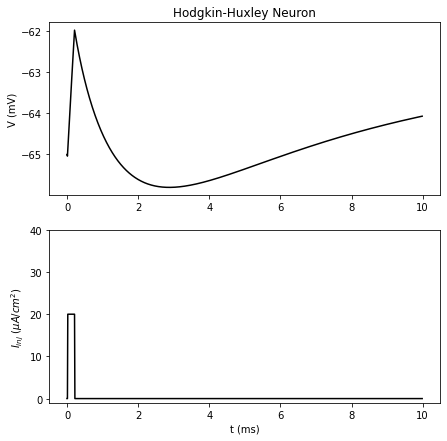

In [92]:
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

## part 2: action potential-time (changing the excitation value to calculate the minimum excitation for neuron spiking)

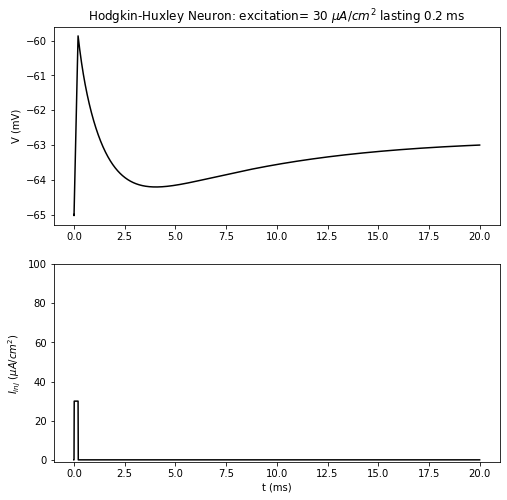

----------------------------------------------------------------------------------------------------


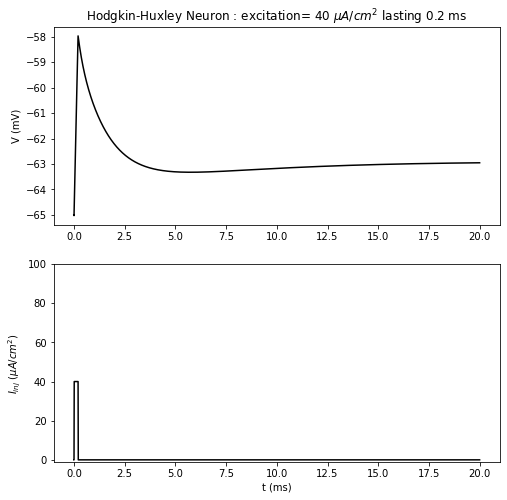

----------------------------------------------------------------------------------------------------


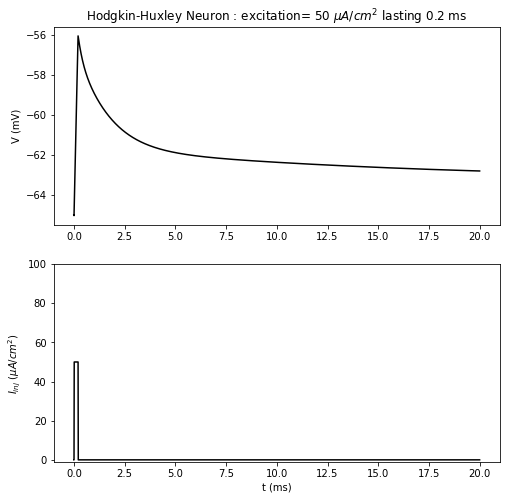

----------------------------------------------------------------------------------------------------


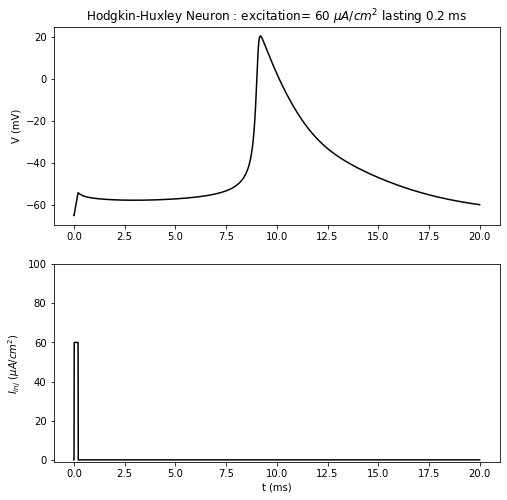

In [71]:
class HodgkinHuxley():
    
    C_m  =  1.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0


    t = sp.arange(-0.01, 20.0, 0.01) #time
    
    #Channel gating kinetics. Functions of membrane voltage
    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    def I_inj1(self, t):
        return 30*(t>0) - 30*(t>0.2)

    def I_inj2(self, t):
        return 40*(t>0) - 40*(t>0.2)

    def I_inj3(self, t):
        return 50*(t>0) - 50*(t>0.2)

    def I_inj4(self, t):
        return 60*(t>0) - 60*(t>0.2)
    
    @staticmethod
    def dALLdt1(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj1(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt2(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj2(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt3(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj3(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt4(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj4(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt1, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)
        plt.figure(figsize=(8,8))
        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron: excitation= 30 $\\mu{A}/cm^2$ lasting 0.2 ms ')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj1(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)
        
        X = odeint(self.dALLdt2, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : excitation= 40 $\\mu{A}/cm^2$ lasting 0.2 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj2(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)

        X = odeint(self.dALLdt3, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : excitation= 50 $\\mu{A}/cm^2$ lasting 0.2 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj3(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)

        X = odeint(self.dALLdt4, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : excitation= 60 $\\mu{A}/cm^2$ lasting 0.2 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj4(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()

if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()


## part 3: compute the minimum excitation current for different excitation widths

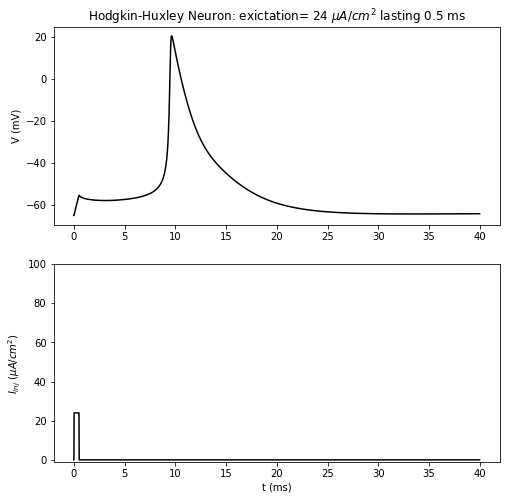

----------------------------------------------------------------------------------------------------


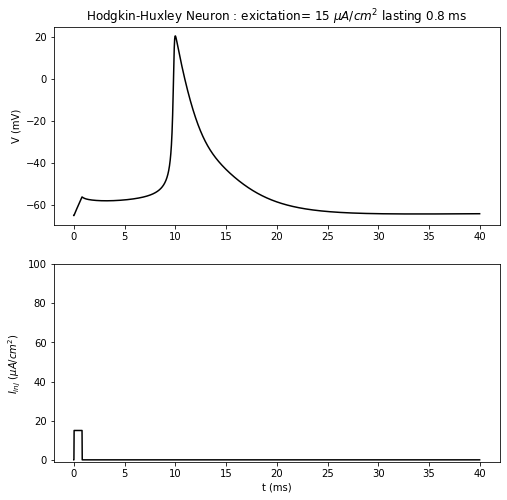

----------------------------------------------------------------------------------------------------


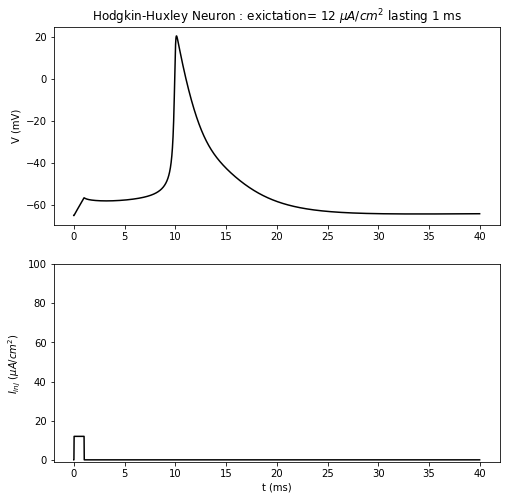

----------------------------------------------------------------------------------------------------


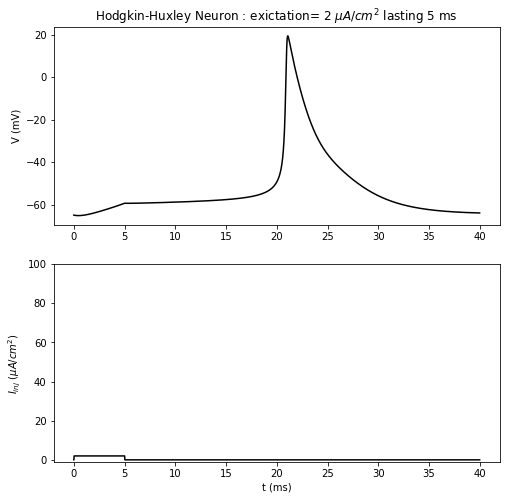

----------------------------------------------------------------------------------------------------


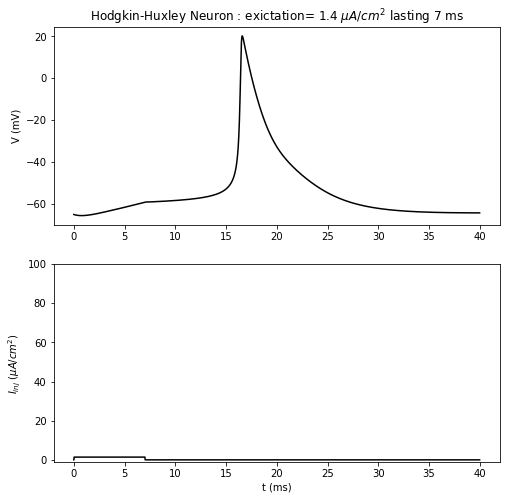

In [90]:
class HodgkinHuxley():

    C_m  =  1.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0

    t = sp.arange(-0.01, 40.0, 0.01)


    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):

        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):

        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    
    # injected I
    def I_inj1(self, t):
        return 24*(t>0) - 24*(t>0.5)
    def I_inj2(self, t):
        return 15*(t>0) - 15*(t>0.8)
    def I_inj3(self, t):
        return 12*(t>0) - 12*(t>1)
    def I_inj4(self, t):
        return 2*(t>0) - 2*(t>5)
    def I_inj5(self, t):
        return 1.4*(t>0) - 1.4*(t>7)

    @staticmethod
    def dALLdt1(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj1(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt2(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj2(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt3(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj3(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt4(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj4(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt5(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj5(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt1, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)
        plt.figure(figsize=(8,8))
        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron: exictation= 24 $\\mu{A}/cm^2$ lasting 0.5 ms ')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj1(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)
        
        X = odeint(self.dALLdt2, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : exictation= 15 $\\mu{A}/cm^2$ lasting 0.8 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj2(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)
        X = odeint(self.dALLdt3, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : exictation= 12 $\\mu{A}/cm^2$ lasting 1 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj3(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)

        X = odeint(self.dALLdt4, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : exictation= 2 $\\mu{A}/cm^2$ lasting 5 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj4(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
        print ('-' * 100)


        X = odeint(self.dALLdt5, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : exictation= 1.4 $\\mu{A}/cm^2$ lasting 7 ms')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj5(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()


if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()


## 2) m , n , h - time

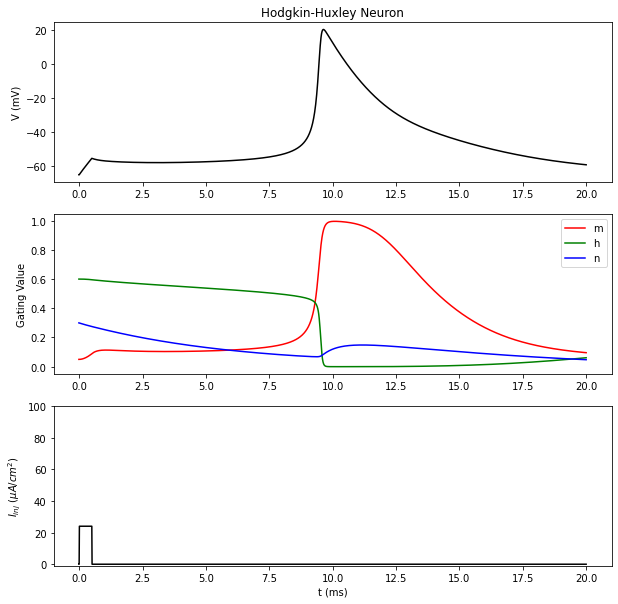

In [101]:
class HodgkinHuxley():

    C_m  =  1.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0

    t = sp.arange(-0.01, 20.0, 0.01)


    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):

        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):

        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    
    def I_inj(self, t):
        return 24*(t>0) - 24*(t>0.5)

    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X

        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(10,10))

        plt.subplot(3,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(3,1,2)
        plt.plot(self.t, m, 'r', label='m')
        plt.plot(self.t, h, 'g', label='h')
        plt.plot(self.t, n, 'b', label='n')
        plt.ylabel('Gating Value')
        plt.legend()

        plt.subplot(3,1,3)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

## 3) I(Na) , I(K) , I(Leak) - time

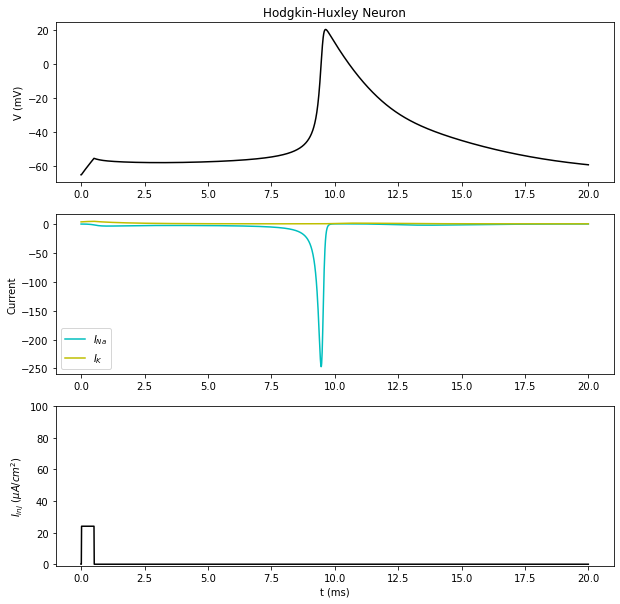

In [105]:
class HodgkinHuxley():

    C_m  =  1.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0

    t = sp.arange(-0.01, 20.0, 0.01)


    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):

        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):

        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    
    def I_inj(self, t):
        return 24*(t>0) - 24*(t>0.5)

    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X

        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(10,10))

        plt.subplot(3,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(3,1,2)
        plt.plot(self.t, ina, 'c', label='$I_{Na}$')
        plt.plot(self.t, ik, 'y', label='$I_{K}$')
        plt.ylabel('Current')
        plt.legend()

        plt.subplot(3,1,3)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 100)

        plt.show()
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

## 4) increasing the capacitance of membrane In single excitation state

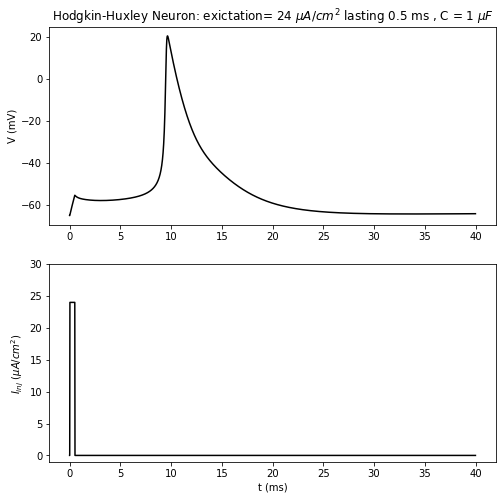

----------------------------------------------------------------------------------------------------


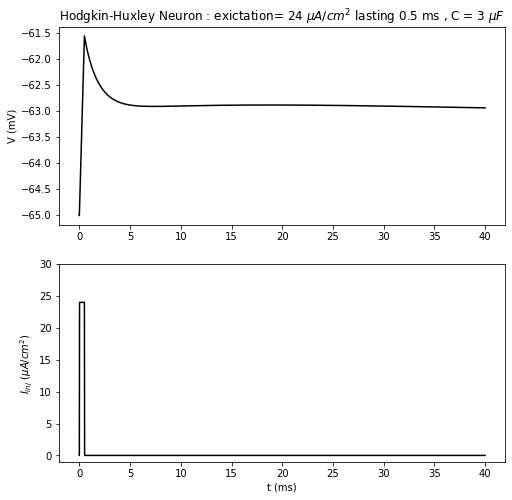

----------------------------------------------------------------------------------------------------


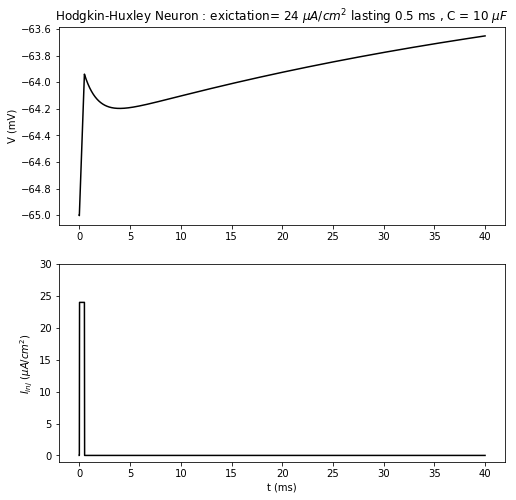

In [113]:
class HodgkinHuxley():

    C_m1 =  1.0
    C_m2 =  3.0
    C_m3 =  10.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0

    t = sp.arange(-0.01, 40.0, 0.01)


    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):

        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):

        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    
    # injected I
    def I_inj(self, t):
        return 24*(t>0) - 24*(t>0.5)
    # def I_inj2(self, t):
    #     return 15*(t>0) - 15*(t>0.8)
    # def I_inj3(self, t):
    #     return 12*(t>0) - 12*(t>1)
    # def I_inj4(self, t):
    #     return 2*(t>0) - 2*(t>5)
    # def I_inj5(self, t):
    #     return 1.4*(t>0) - 1.4*(t>7)

    @staticmethod
    def dALLdt1(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m1
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt2(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m2
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    @staticmethod
    def dALLdt3(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m3
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt1, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)
        plt.figure(figsize=(8,8))
        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron: exictation= 24 $\\mu{A}/cm^2$ lasting 0.5 ms , C = 1 $\\mu{F}$ ')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 30)

        plt.show()
        print ('-' * 100)
        
        X = odeint(self.dALLdt2, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : exictation= 24 $\\mu{A}/cm^2$ lasting 0.5 ms , C = 3 $\\mu{F}$ ')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 30)

        plt.show()
        print ('-' * 100)
        X = odeint(self.dALLdt3, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(8,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron : exictation= 24 $\\mu{A}/cm^2$ lasting 0.5 ms , C = 10 $\\mu{F}$ ')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 30)

        plt.show()


if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()


## 5) changing the injected I

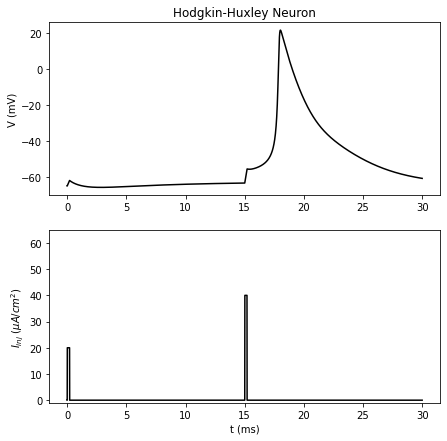

In [123]:
class HodgkinHuxley():
    #The Hodgkin–Huxley Constants
    C_m  =   1.0
    g_Na = 40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0
    t = sp.arange(-0.01, 30.0, 0.01)#time
    
    #Channel gating kinetics. Functions of membrane voltage
    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def I_inj(self, t):
        return 20*(t>0) - 20*(t>0.2) + 40*(t>15) - 40*(t>15.2)
    
    #calculate membrane potential & activation variables
    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X

        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(7,7))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')


        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 65)

        plt.show()
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

## Analytical Questions

## 1)

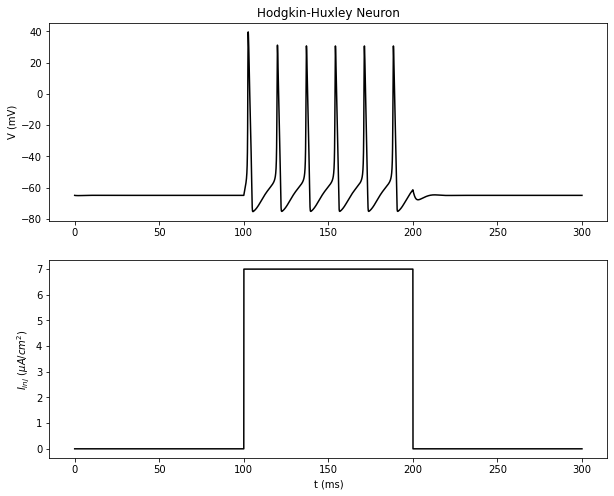

In [132]:
class HodgkinHuxley():

    C_m  =   1.0
    g_Na = 120.0
    g_K  =  36.0
    g_L  =   0.3
    E_Na =  50.0
    E_K  = -77.0
    E_L  = -54.387

    t = sp.arange(0.0, 300.0, 0.01)

    def alpha_m(self, V):
        return 0.1*(V+40.0)/(1.0 - sp.exp(-(V+40.0) / 10.0))

    def beta_m(self, V):
        return 4.0*sp.exp(-(V+65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07*sp.exp(-(V+65.0) / 20.0)

    def beta_h(self, V):
        return 1.0/(1.0 + sp.exp(-(V+35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01*(V+55.0)/(1.0 - sp.exp(-(V+55.0) / 10.0))

    def beta_n(self, V):
        return 0.125*sp.exp(-(V+65) / 80.0)

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def I_inj(self, t):
        return 7*(t>100) - 7*(t>200)

    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X

        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(10,8))

        plt.subplot(2,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')

        plt.subplot(2,1,2)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        # plt.ylim(-1, 40)

        plt.show()

if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

## 2)

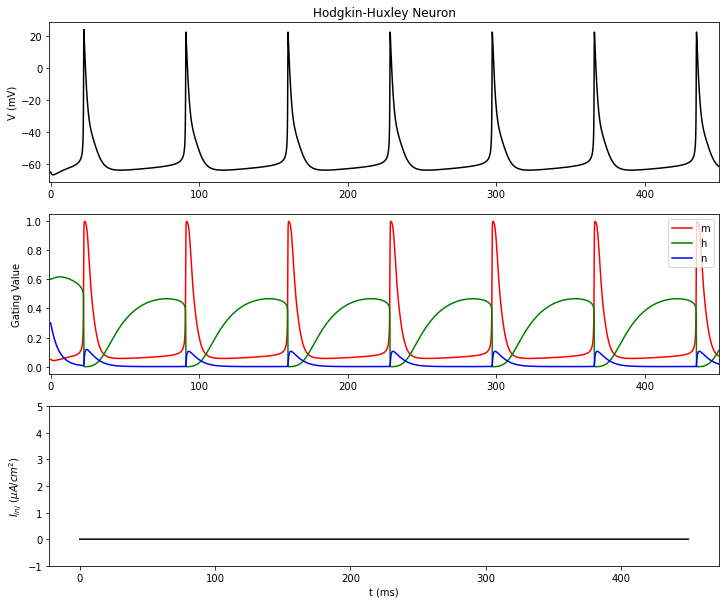

In [128]:
import scipy as sp
import pylab as plt
from scipy.integrate import odeint

class HodgkinHuxley():
    C_m  =   1.0
    g_Na = 60#40.0
    g_K  =  35.0
    g_L  =   0.3
    E_Na =  55.0
    E_K  = -77.0
    E_L  = -65.0
    t = sp.arange(-0.1, 450.0, 0.01)
    
    def alpha_m(self, V):
        return 0.182*(V+35.0)/(1.0 - sp.exp(-(V+35.0) / 9.0))

    def beta_m(self, V):
        return -0.124*(V+35.0)/(1.0 -sp.exp((V+35.0) / 9.0))

    def alpha_h(self, V):
        return 0.25*sp.exp(-(V+90.0) /12.0)

    def beta_h(self, V):
        return 0.25*sp.exp((V+62.0) /6.0)/sp.exp((V+90.0) /12.0)

    def alpha_n(self, V):
        return 0.02*(V-25.0)/(1.0 - sp.exp(-(V-25.0) / 9.0))

    def beta_n(self, V):
        return -0.002*(V-25.0)/(1.0 - sp.exp((V-25.0) / 9.0))

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def I_inj(self, t):
        return 0#return 10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)

    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X

        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.3], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure(figsize=(12,10))

        plt.subplot(3,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')
        plt.xlim(-1,450)


        plt.subplot(3,1,2)
        plt.plot(self.t, m, 'r', label='m')
        plt.plot(self.t, h, 'g', label='h')
        plt.plot(self.t, n, 'b', label='n')
        plt.ylabel('Gating Value')
        plt.xlim(-1,450)
        plt.legend()

        plt.subplot(3,1,3)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 5)

        plt.show()
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()
